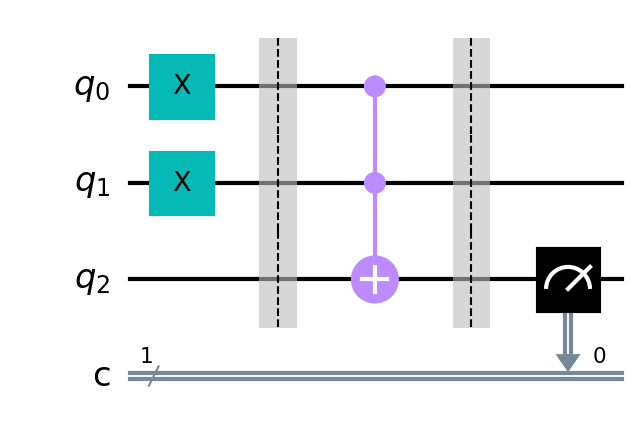

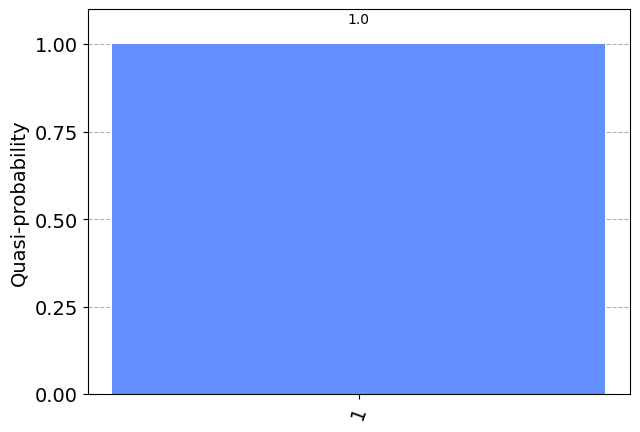

In [1]:
"""boolean_gates.ipynb"""
# Cell 1 - Quantum emulation of a classical Boolean AND Gate

from __future__ import annotations

import typing

from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any


backend: Any = Aer.get_backend("aer_simulator")
qc: Any = QuantumCircuit(3, 1)

qc.x(0)
qc.x(1)
qc.barrier()

qc.ccx(0, 1, 2)
qc.barrier()

qc.measure(2, 0)

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
display(plot_distribution(counts))  # type: ignore


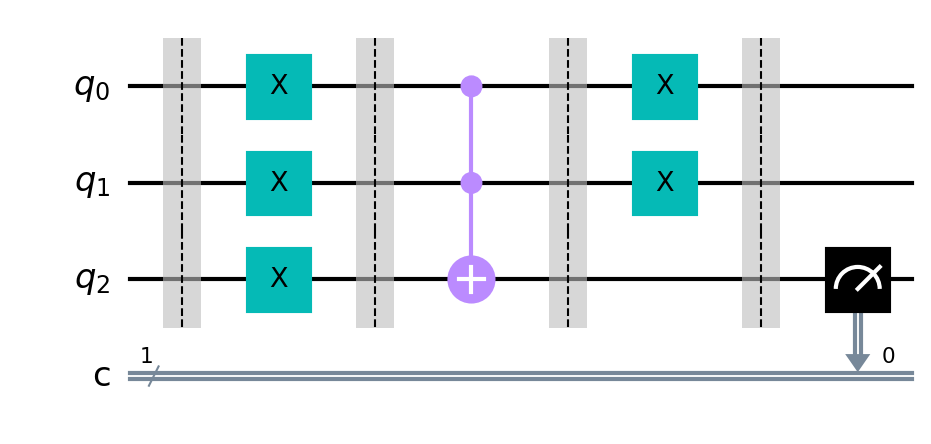

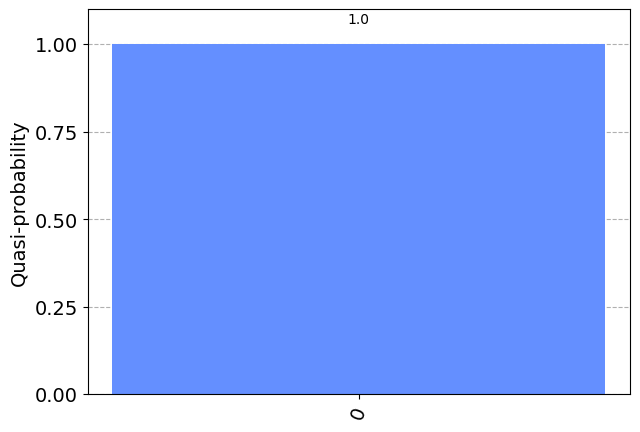

In [2]:
# Cell 2 - Quantum emulation of a classical Boolean OR Gate

backend: Any = Aer.get_backend("aer_simulator")
qc: Any = QuantumCircuit(3, 1)

# qc.x(0)
# qc.x(1)
qc.barrier()

qc.x(0)
qc.x(1)
qc.x(2)
qc.barrier()

qc.ccx(0, 1, 2)
qc.barrier()

qc.x(0)
qc.x(1)
qc.barrier()

qc.measure(2, 0)

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
display(plot_distribution(counts))  # type: ignore


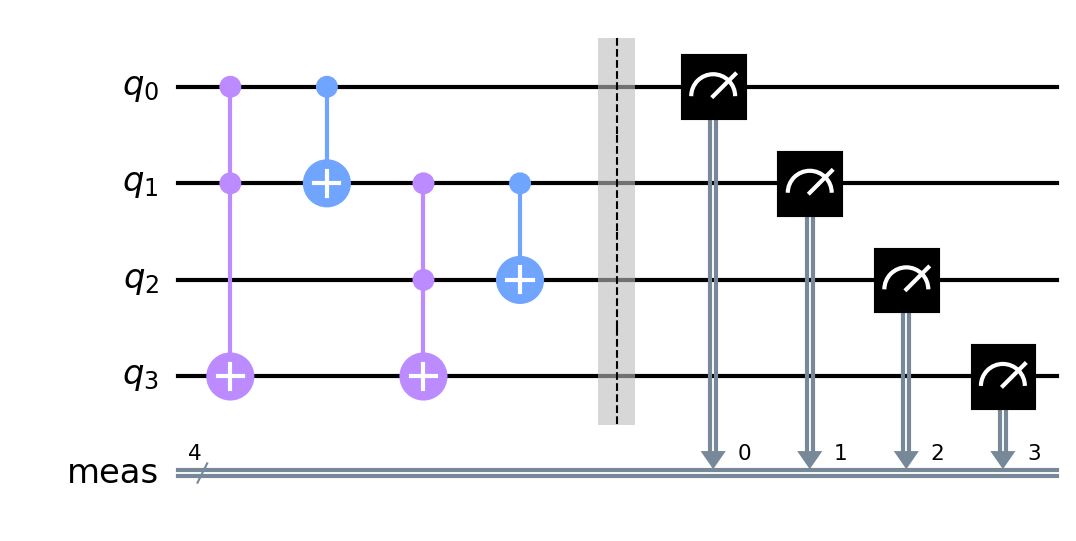

In [3]:
# Cell 3 - Feynman's Full Adder (1985)

backend: Any = Aer.get_backend("aer_simulator")
qc: Any = QuantumCircuit(4)

qc.ccx(0, 1, 3)
qc.cx(0, 1)
qc.ccx(1, 2, 3)
qc.cx(1, 2)
qc.measure_all()

display(qc.draw(output="mpl", scale=1.5))


In [5]:
# Cell 4 - Generate truth table for Feynman's Full Adder


def full_carry(a: Any, b: Any, c_in: Any) -> Any:
    backend: Any = Aer.get_backend("aer_simulator")
    qc: Any = QuantumCircuit(4)

    # Initialize input bit to one if necessary
    if a == 1:
        qc.x(0)
    if b == 1:
        qc.x(1)
    if c_in == 1:
        qc.x(2)

    qc.ccx(0, 1, 3)
    qc.cx(0, 1)
    qc.ccx(1, 2, 3)
    qc.cx(1, 2)
    qc.measure_all()

    result: Any = execute(qc, backend, shots=1).result()
    counts: Any = result.get_counts()

    return counts


print("|c_in| b | a |  |c_out| s |")
print("|----|---|---|  |-----|---|")

for c_in in [0, 1]:
    for b in [0, 1]:
        for a in [0, 1]:
            result: list[Any] = list(full_carry(a, b, c_in))[0]
            c_out: Any = result[0]  # Qubit 3 in Feynman's Full Adder
            s: Any = result[1]  # Qubit 2 in Feynman's Full Adder
            print(f"|  {c_in} | {b} | {a} |  |  {c_out}  | {s} |")


|c_in| b | a |  |c_out| s |
|----|---|---|  |-----|---|
|  0 | 0 | 0 |  |  0  | 0 |
|  0 | 0 | 1 |  |  0  | 1 |
|  0 | 1 | 0 |  |  0  | 1 |
|  0 | 1 | 1 |  |  1  | 0 |
|  1 | 0 | 0 |  |  0  | 1 |
|  1 | 0 | 1 |  |  1  | 0 |
|  1 | 1 | 0 |  |  1  | 0 |
|  1 | 1 | 1 |  |  1  | 1 |
